In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

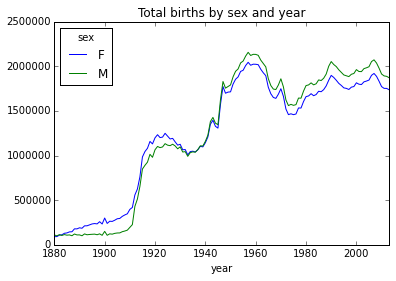

In [3]:
%matplotlib inline
names = pd.read_csv('names/babynames.txt', \
	names = ['year', 'sex', 'name', 'births'])
total_births = names.pivot_table('births', \
	index = 'year', columns = 'sex', aggfunc = sum)
total_births.tail()
total_births.plot(title = 'Total births by sex and year')

In [4]:
def add_prop(group):
	# Integer division floors
	births = group.births.astype(float)

	group['prop'] = births / births.sum()
	return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [6]:
names[:10]

,year,sex,name,births,prop
1,1880,F,Mary,7065,0.077643
2,1880,F,Anna,2604,0.028618
3,1880,F,Emma,2003,0.022013
4,1880,F,Elizabeth,1939,0.021309
5,1880,F,Minnie,1746,0.019188
6,1880,F,Margaret,1578,0.017342
7,1880,F,Ida,1472,0.016177
8,1880,F,Alice,1414,0.015540
9,1880,F,Bertha,1320,0.014507
10,1880,F,Sarah,1288,0.014155


In [7]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [8]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
	pieces.append(group.sort_values(by = 'births', ascending = False)[:1000])
	top1000 = pd.concat(pieces, ignore_index = True)

In [9]:
len(top1000.index)

267877

In [10]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10eeec8d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10f33af90>], dtype=object)

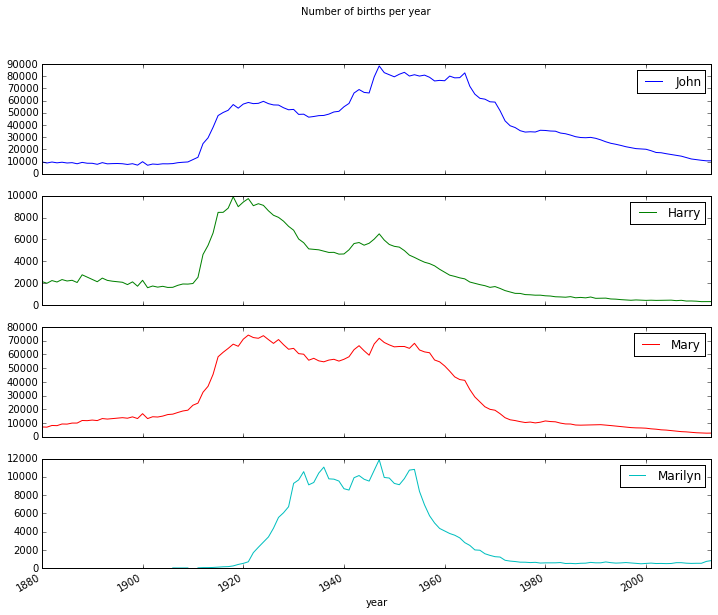

In [11]:
total_births = top1000.pivot_table('births', index = 'year', \
	columns = 'name', aggfunc = sum)
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots = True, figsize = (12, 10), grid = False, \
	title = 'Number of births per year')

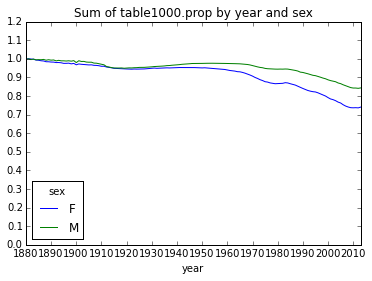

In [12]:
table = top1000.pivot_table('prop', index = 'year', \
	columns = 'sex', aggfunc = sum)
table.plot(title = 'Sum of table1000.prop by year and sex', \
	yticks = np.linspace(0, 1.2, 13), \
	xticks = range(1880, 2020, 10))

In [13]:
df = boys[boys.year == 2010]
prop_cumsum = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
prop_cumsum[:10]
prop_cumsum.searchsorted(0.5)

array([116])

In [14]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
in1900.searchsorted(0.5) + 1

array([25])

In [15]:
def get_quantile_count(group, q = 0.5):
	group = group.sort_values(by = 'prop', ascending = False)
	return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.dtypes

sex
F    object
M    object
dtype: object

In [16]:
diversity[['F', 'M']] = diversity[['F', 'M']].astype(int)
diversity.dtypes

sex
F    int64
M    int64
dtype: object

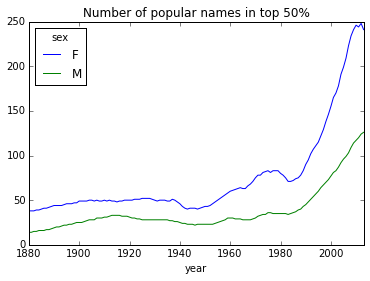

In [17]:
diversity.plot(title = 'Number of popular names in top 50%')

In [18]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index = last_letters, \
	columns = ['sex', 'year'], aggfunc = sum)

In [19]:
subtable = table.reindex(columns = [1910, 1960, 2010], level = 'year')
subtable.head()

sex               F                      M                
year           1910    1960    2010   1910    1960    2010
last_letter                                               
a            108395  691241  675559    977    5212   28796
b               NaN     694     454    411    3914   39190
c                 5      49     953    482   15470   23296
d              6751    3729    2635  22113  262153   44726
e            133599  435042  316118  28663  178814  129999

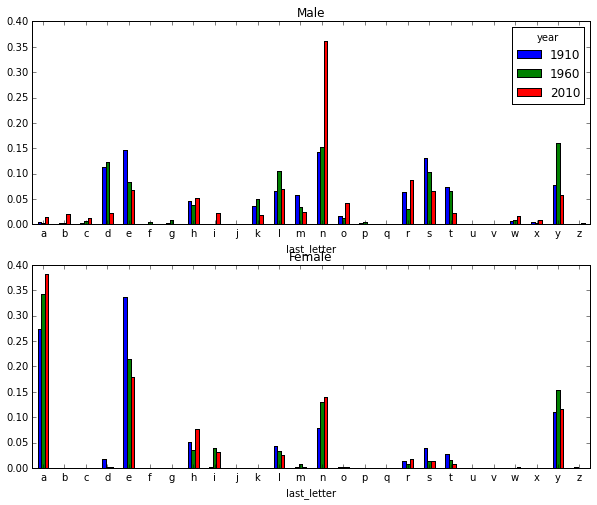

In [20]:
subtable.sum()
letter_prop = subtable / subtable.sum().astype(float)
fig, axes = plt.subplots(2, 1, figsize = (10, 8))
letter_prop['M'].plot(kind = 'bar', rot = 0, ax = axes[0], title = 'Male')
letter_prop['F'].plot(kind = 'bar', rot = 0, ax = axes[1], title = 'Female', \
	legend = False)

In [21]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153216,0.075762
1881,0.083249,0.153207,0.077452
1882,0.085340,0.149560,0.077537
1883,0.084058,0.151649,0.079146
1884,0.086119,0.149922,0.080405


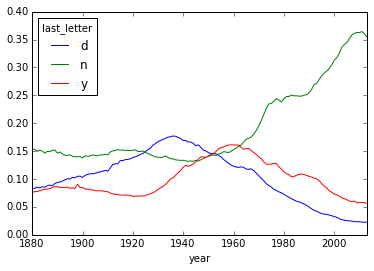

In [22]:
dny_ts.plot()

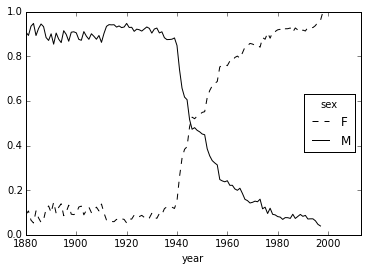

In [23]:
# Boy names that become girl names and vice versa

# Example Leslie
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

table = filtered.pivot_table('births', index = 'year', columns = 'sex', \
	aggfunc = sum)
table = table.div(table.sum(1), axis = 0)
table.tail()

table.plot(style = {'M': 'k-', 'F': 'k--'})